<a href="https://colab.research.google.com/github/rhdtka21/DeepLearningProject/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
df = pd.read_csv('crime.csv')
df.shape
df = df.rename(columns=df.iloc[0])[1:]

In [398]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


In [399]:
df

,죄종별(1),죄종별(2),죄종별(3),발생건수 (건),검거건수 (건),검거율 (%),검거인원 (명),남자검거인원 (명),여자검거인원 (명),불상검거인원 (명),법인체 (개)
1,총계,소계,소계,1580751,1328609,84,1728602,1286156,329007,113439,12302
2,강력범죄,소계,소계,26787,25811,96.4,28859,27339,1196,324,-
3,강력범죄,살인기수,소계,309,298,96.4,358,289,67,2,-
4,강력범죄,살인기수,살인,226,217,96,269,218,49,2,-
5,강력범죄,살인기수,영아살해,7,7,100,6,-,6,-,-
...,...,...,...,...,...,...,...,...,...,...,...
509,기타범죄,허위감정증거인멸·은닉증인은닉죄,소계,89,67,75.3,177,129,36,12,-
510,기타범죄,형사소송법,소계,1,1,100,2,2,-,-,-
511,기타범죄,형의실효등에관한법률,소계,9,8,88.9,22,15,2,5,-
512,기타범죄,화물자동차운수사업법,소계,2379,2349,98.7,3373,3217,150,6,116


In [400]:
crime_names = df['죄종별(1)'].drop_duplicates().values[1:]
crime_names

array(['강력범죄', '절도범죄', '폭력범죄', '지능범죄', '풍속범죄', '특별경제범죄', '마약범죄', '보건범죄',
       '환경범죄', '교통범죄', '노동범죄', '안보범죄', '선거범죄', '병역범죄', '기타범죄'],
      dtype=object)

In [0]:
crimes = []
for crime_name in crime_names:
  crime = df[(df['죄종별(1)'] == crime_name) & (df['죄종별(2)'] == '소계')]
  crime = crime.apply(pd.to_numeric, errors='coerce').fillna(0).iloc[:, 3:]
  index_num = crime.index[0]
  crime = crime.rename(index={index_num:crime_name})
  crimes.append(crime)

result = pd.concat(crimes, ignore_index=False)
result_big = result[result['발생건수 (건)'] >= 50000]
result_small = result[result['발생건수 (건)'] < 50000]
crime_big_names = result_big.index
crime_small_names = result_small.index


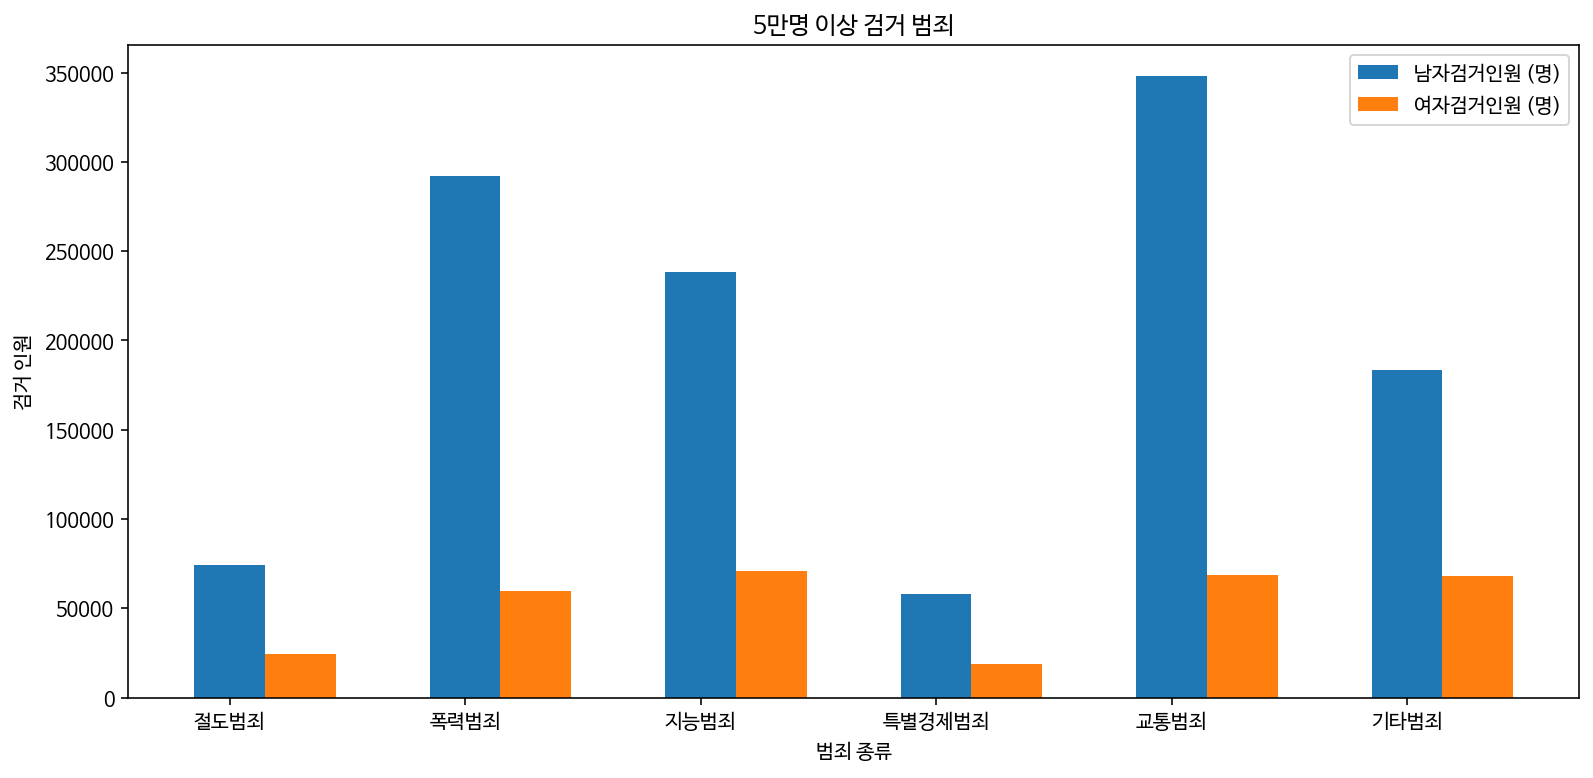

In [402]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1,1,1)
x = np.arange(len(crime_big_names))
p1 = plt.bar(x, result_big['남자검거인원 (명)'].values,  width=0.3, label='남자검거인원 (명)')

p2 = plt.bar(x + 0.3, result_big['여자검거인원 (명)'].values, width=0.3, label='여자검거인원 (명)')
plt.xticks(x, crime_big_names)
plt.legend()
plt.xlabel('범죄 종류')
plt.ylabel('검거 인원')
plt.title('5만명 이상 검거 범죄')

plt.show()


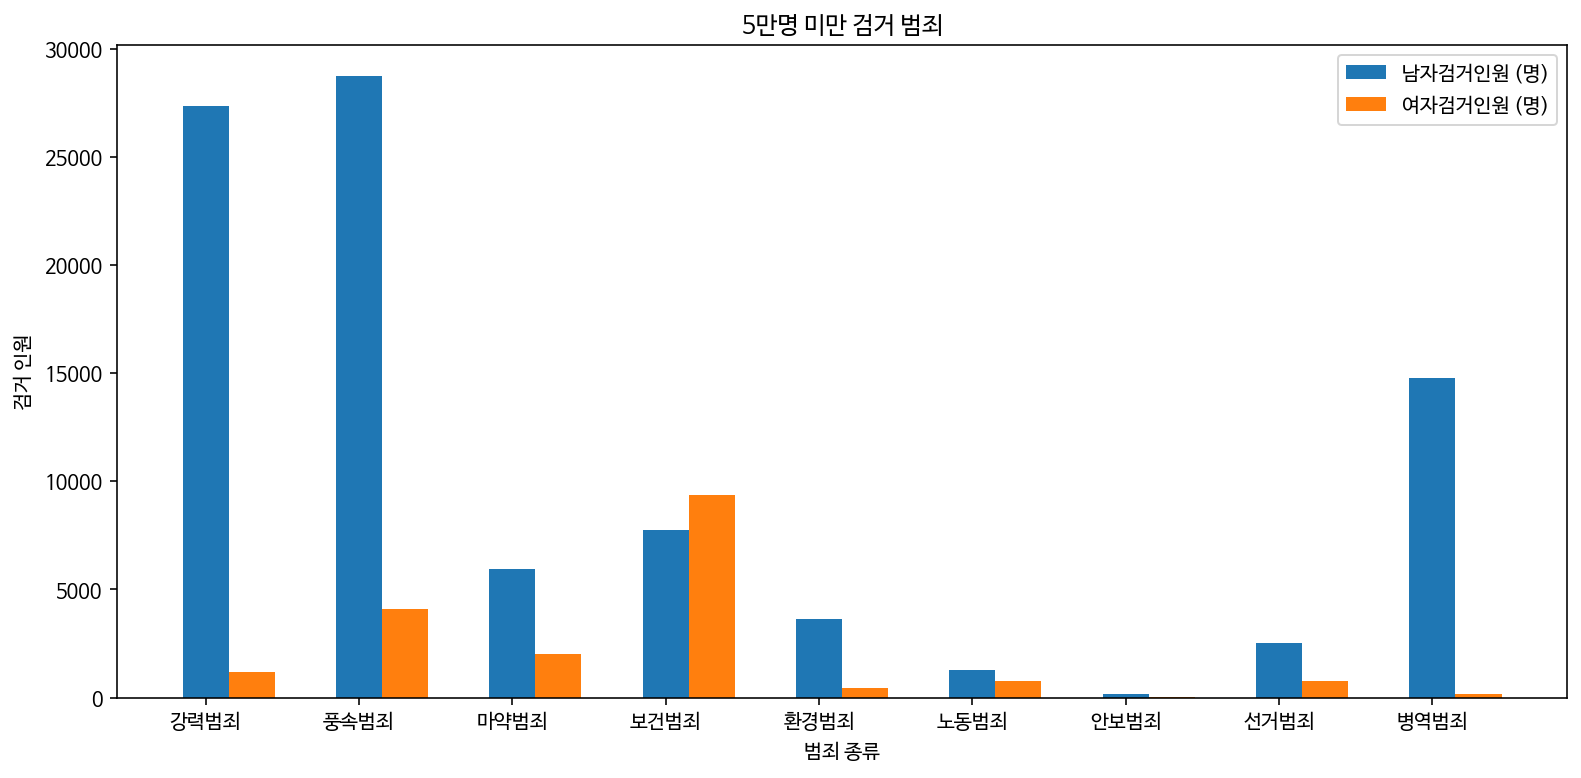

In [403]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1,1,1)
x = np.arange(len(crime_small_names))
p1 = plt.bar(x, result_small['남자검거인원 (명)'].values, width=0.3, label='남자검거인원 (명)')

p2 = plt.bar(x + 0.3, result_small['여자검거인원 (명)'].values, width=0.3, label='여자검거인원 (명)')
plt.xticks(x, crime_small_names)
plt.legend()
plt.xlabel('범죄 종류')
plt.ylabel('검거 인원')
plt.title('5만명 미만 검거 범죄')

plt.show()


In [404]:
temp = {}
for c in result.columns:
  temp[c] = result_small[c].sum()

result_others=pd.DataFrame(temp, index = ['기타'])

result_sum = pd.concat([result_big, result_others],ignore_index=False)
crime_sum_names = result_sum.index
result_sum

,발생건수 (건),검거건수 (건),검거율 (%),검거인원 (명),남자검거인원 (명),여자검거인원 (명),불상검거인원 (명),법인체 (개)
절도범죄,176809,106669,60.3,100392,74348,24369,1675,8.0
폭력범죄,287611,251586,87.5,357264,291787,59445,6032,30.0
지능범죄,344698,245413,71.2,383560,238233,70997,74330,872.0
특별경제범죄,53994,46222,85.6,82135,58096,18643,5396,3391.0
교통범죄,408371,397277,97.3,423483,347858,68570,7055,869.0
기타범죄,221862,198903,89.7,268177,183675,68027,16475,5050.0
기타,87406,82539,1017.6,113591,92159,18956,2476,2082.0


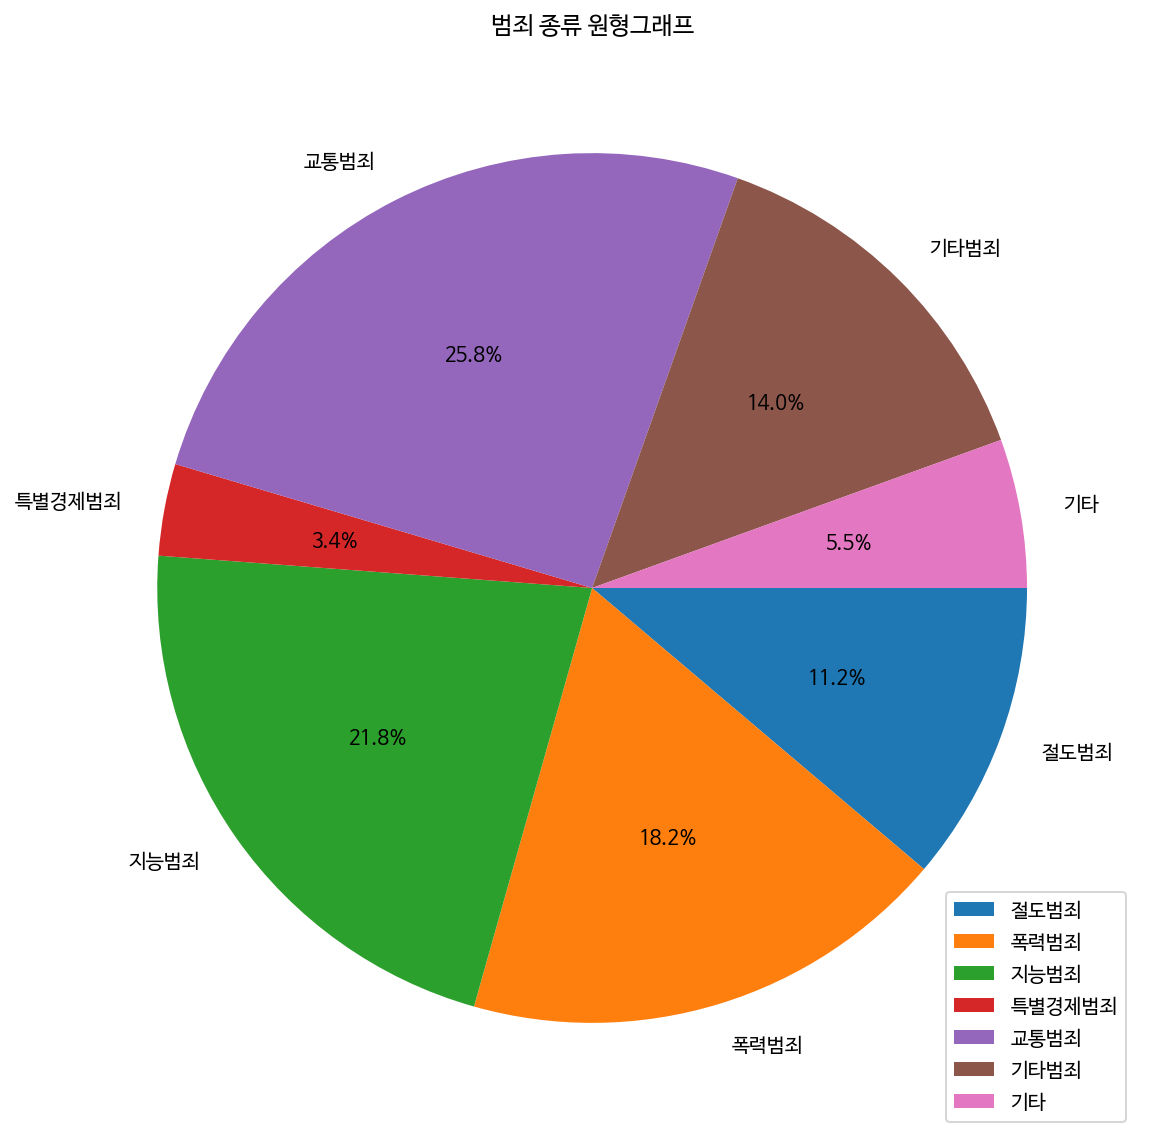

In [405]:
plt.figure(figsize=(10, 10))

plt.pie(result_sum['발생건수 (건)'], labels = crime_sum_names, counterclock=False, autopct='%1.1f%%')
plt.legend()
plt.title('범죄 종류 원형그래프')
plt.show()

In [406]:
df = pd.read_csv('population.csv')

df

,행정구역별,연령별,항목,단위,1925 년,1930 년,1935 년,1940 년,1944 년,1949 년,1955 년,1960 년,1966 년,1970 년,1975 년,1980 년,1985 년,1990 년,1995 년,2000 년,2005 년,2010 년
0,전국,계,인구,명,19020030.00,20438108.00,22208102.00,23547465.00,25120174.00,20166756.0,21502386.00,24989241.00,29159640.00,31435252.00,34678972.00,37406815.00,40419652.00,43390374.0,44553710.00,45985289.00,47041434.00,47990761.0
1,전국,계,남자,명,9726150.00,10398889.00,11271005.00,11839295.00,12521173.00,10188238.0,10752973.00,12543968.00,14684147.00,15779615.00,17445246.00,18749306.00,20227564.00,21770919.0,22357352.00,23068181.00,23465650.00,23840896.0
2,전국,계,여자,명,9293880.00,10039219.00,10937097.00,11708170.00,12599001.00,9978518.0,10749413.00,12445273.00,14475493.00,15655637.00,17233726.00,18657509.00,20192088.00,21619455.0,22196358.00,22917108.00,23575784.00,24149865.0
3,전국,계,성비,NaN,104.65,103.58,103.05,101.12,99.38,102.1,100.03,100.79,101.44,100.79,101.23,100.49,100.18,100.7,100.73,100.66,99.53,98.7
4,전국,0 - 4세,인구,명,3069586.00,3281683.00,3671581.00,3897658.00,4278618.00,NaN,3376648.00,3549564.00,4480921.00,4316143.00,4227360.00,3794692.00,3702555.00,3279790.0,3427409.00,3130258.00,2382350.00,2219084.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,함경남도,80 - 84세,성비,NaN,90.90,NaN,NaN,NaN,88.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2628,함경남도,85세이상,인구,명,700.00,NaN,NaN,NaN,1875.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2629,함경남도,85세이상,남자,명,301.00,NaN,NaN,NaN,742.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2630,함경남도,85세이상,여자,명,399.00,NaN,NaN,NaN,1133.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [434]:
sector_names = []
for sector_name in df['행정구역별'].drop_duplicates().values:
  if sector_name in ['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시']:
    sector_names.append(sector_name)
sector_names

['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시']

In [468]:
sectors = []
for sector_name in sector_names:
  sector = df[(df['행정구역별'] == sector_name) & (df['연령별'] == '계') & (df['항목'] == '인구')]
  sectors.append(sector)

result = pd.concat(sectors, ignore_index=False)
result = result.set_index('행정구역별')
result

,연령별,항목,단위,1925 년,1930 년,1935 년,1940 년,1944 년,1949 년,1955 년,1960 년,1966 년,1970 년,1975 년,1980 년,1985 년,1990 년,1995 년,2000 년,2005 년,2010 년
행정구역별,,,,,,,,,,,,,,,,,,,,,
전국,계,인구,명,19020030.0,20438108.0,22208102.0,23547465.0,25120174.0,20166756.0,21502386.0,24989241.0,29159640.0,31435252.0,34678972.0,37406815.0,40419652.0,43390374.0,44553710.0,45985289.0,47041434.0,47990761.0
서울특별시,계,인구,명,NaN,NaN,NaN,NaN,NaN,1437670.0,1568746.0,2445402.0,3793280.0,5525262.0,6879464.0,8350616.0,9625755.0,10603250.0,10217177.0,9853972.0,9762546.0,9631482.0
부산광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426019.0,1876391.0,2450125.0,3156931.0,3512113.0,3795892.0,3809618.0,3655437.0,3512547.0,3393191.0
대구광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2028370.0,2227979.0,2445288.0,2473990.0,2456016.0,2431774.0
인천광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1384916.0,1816328.0,2304176.0,2466338.0,2517680.0,2632035.0
광주광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1138717.0,1257063.0,1350948.0,1413644.0,1466143.0
대전광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1049122.0,1270873.0,1365961.0,1438551.0,1490158.0
울산광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012110.0,1044934.0,1071673.0


In [472]:
years = result.columns[3:]
years

Index(['1925 년', '1930 년', '1935 년', '1940 년', '1944 년', '1949 년', '1955 년',
       '1960 년', '1966 년', '1970 년', '1975 년', '1980 년', '1985 년', '1990 년',
       '1995 년', '2000 년', '2005 년', '2010 년'],
      dtype='object')

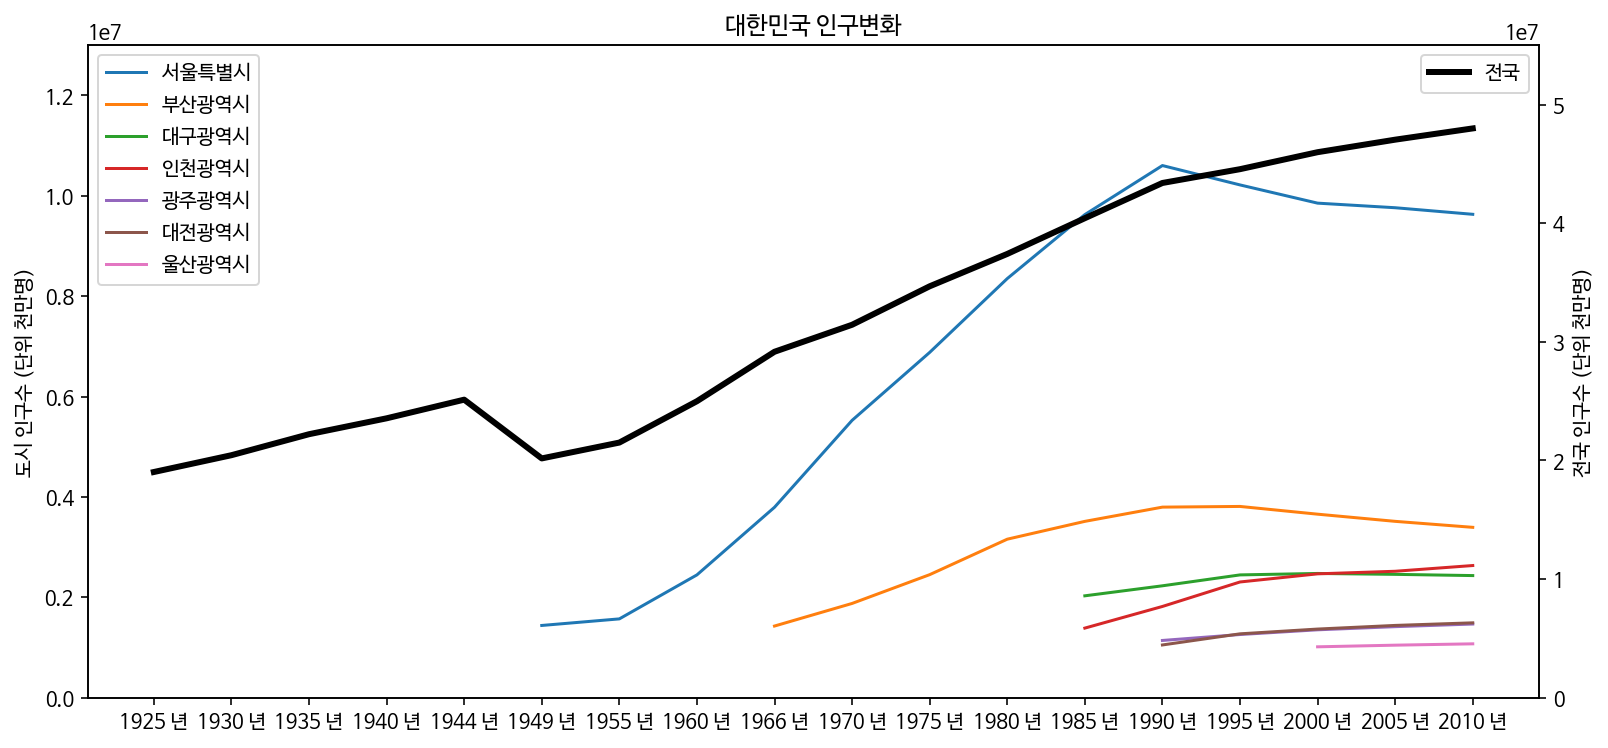

In [520]:
fig = plt.figure(figsize=(13,6))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()
for sector_name in sector_names[1:]:
  ax1.plot(years, result.loc[sector_name].apply(pd.to_numeric, errors='coerce')[3:], label=sector_name)
ax2.plot(years, result.loc['전국'].apply(pd.to_numeric, errors='coerce')[3:], label='전국', color='black', linewidth=3)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')
plt.xlabel('년도 (5년단위)')
ax1.set_ylabel('도시 인구수 (단위 천만명)')
ax2.set_ylabel('전국 인구수 (단위 천만명)')

plt.title('대한민국 인구변화')
ax2.set_ylim(0, 55000000)
ax1.set_ylim(0, 13000000)

plt.show()